In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_excel('./online_retail_II.xlsx')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [8]:
df[df['Quantity']<0].shape[0]

12326

In [9]:
df['Invoice']=df['Invoice'].astype(str)

In [10]:
df[df['Invoice'].str.match(r"^\d{6}$") ==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [11]:
df['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
df['StockCode'] =df['StockCode'].astype(str)

In [14]:
df[df['StockCode'].str.match(r"^\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [15]:
df[(df['StockCode'].str.match(r"^\d{5}$") == False) & (df['StockCode'].str.match(r"^\d{5}[a-zA-Z]+$") == False) ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
df[df['StockCode'].str.match(r"^[a-zA-Z]+$")]['StockCode'].unique()

array(['POST', 'D', 'DOT', 'M', 'PADS', 'ADJUST', 'DCGSSGIRL', 'GIFT',
       'DCGSLBOY', 'm', 'DCGSSBOY', 'DCGSLGIRL', 'S', 'B', 'AMAZONFEE'],
      dtype=object)

In [17]:
df[df['StockCode'].str.match("\\d{5}[a-zA-Z]+$") == True]['StockCode'].unique()

array(['79323P', '79323W', '48173C', ..., '85049g', '72803b', '79151B'],
      dtype=object)

## Data Cleaning

In [18]:
cdf = df.copy()

In [19]:
cdf['Invoice']= cdf['Invoice'].astype(str)

In [20]:
invoice_filter = (
    cdf['Invoice'].str.match("^\\d{6}$") == True
)

cdf = cdf[invoice_filter]

cdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [21]:
cdf['StockCode'] =cdf['StockCode'].astype(str)


In [22]:
cdf2 = cdf.copy()

In [23]:
stockcode_filter =(
    cdf2['StockCode'].str.match("\\d{5}+$") == True
)

cdf2 = cdf2[stockcode_filter]
cdf2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [24]:
cdf2 = cdf2.dropna(subset=['Customer ID'])

In [25]:
cdf2['Customer ID'].isna().sum()

0

In [26]:
cdf2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350929.000000,350929,350929.000000,350929.000000
mean,13.700113,2010-07-05 17:14:04.387041024,2.979683,15360.276233
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.076779,NaN,4.424721,1678.208380


In [27]:
cdf2=cdf2[cdf2['Price']>0]

In [28]:
len(cdf2)/len(df)

0.667798371334885

### Clustering

In [29]:
cdf2['SalesTotal']=cdf2['Quantity']*cdf2['Price']

In [30]:
cdf2['Customer ID'] = cdf2['Customer ID'].astype(int)

In [31]:
byCustomer = cdf2.groupby(by="Customer ID", as_index= False).agg(
    TotalSpend = ('SalesTotal', 'sum'),
    Counts= ('Invoice', 'nunique'),
    LatestDate = ("InvoiceDate", 'max')

)

In [32]:
byCustomer.head()

,Customer ID,TotalSpend,Counts,LatestDate
0,12346,144.02,2,2010-06-28 13:53:00
1,12347,966.87,2,2010-12-07 14:57:00
2,12348,221.16,1,2010-09-27 14:59:00
3,12349,1946.64,2,2010-10-28 08:23:00
4,12351,300.93,1,2010-11-29 15:23:00


In [33]:
from datetime import datetime

yearEnd = datetime(2010, 12, 12, 23, 59, 0)

In [34]:
byCustomer['sinceYearEnd'] = (yearEnd - byCustomer['LatestDate']).dt.days

In [35]:
byCustomer.head(5)

,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd
0,12346,144.02,2,2010-06-28 13:53:00,167
1,12347,966.87,2,2010-12-07 14:57:00,5
2,12348,221.16,1,2010-09-27 14:59:00,76
3,12349,1946.64,2,2010-10-28 08:23:00,45
4,12351,300.93,1,2010-11-29 15:23:00,13


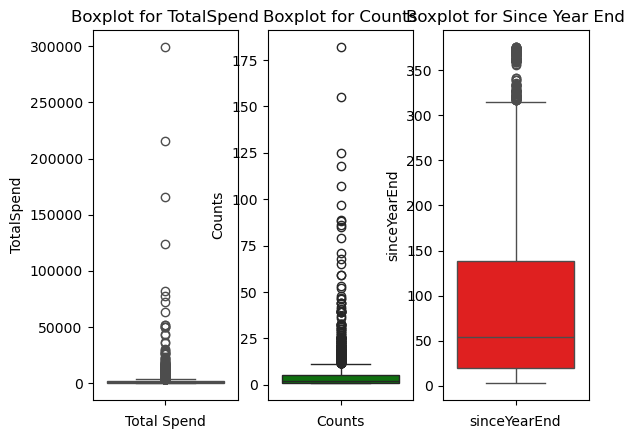

In [36]:
plt.subplot(1,3,1)
sns.boxplot(data=byCustomer['TotalSpend'], color='blue')
plt.title("Boxplot for TotalSpend")
plt.xlabel("Total Spend")

plt.subplot(1,3,2)
sns.boxplot(data=byCustomer['Counts'], color='green')
plt.title("Boxplot for Counts")
plt.xlabel("Counts")

plt.subplot(1,3,3)
sns.boxplot(data=byCustomer['sinceYearEnd'], color='red')
plt.title("Boxplot for Since Year End")
plt.xlabel("sinceYearEnd")

plt.show()

In [37]:
mq1 = byCustomer['TotalSpend'].quantile(0.25)
mq3 = byCustomer['TotalSpend'].quantile(0.75)
miqr = mq3-mq1

totalSpend_outliers = byCustomer[(byCustomer['TotalSpend']>(mq3+1.5*miqr))|(byCustomer['TotalSpend']<(mq1-1.5*miqr)) ]
totalSpend_outliers.describe()


,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd
count,412.000000,412.000000,412.000000,412,412.000000
mean,15083.296117,10433.185922,17.033981,2010-11-10 21:01:28.106796032,31.674757
min,12357.000000,3308.900000,1.000000,2009-12-10 18:03:00,3.000000
25%,13561.750000,3957.300000,8.000000,2010-11-08 13:45:45,6.000000
50%,14956.500000,5389.850000,12.000000,2010-11-26 15:03:30,16.000000
75%,16653.000000,8847.182500,18.000000,2010-12-06 12:47:30,34.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,367.000000
std,1733.822102,22291.545822,19.376882,NaN,49.154417


In [38]:
cq1 = byCustomer['Counts'].quantile(0.25)
cq3 = byCustomer['Counts'].quantile(0.75)
ciqr = cq3-cq1

count_outliers = byCustomer[(byCustomer['Counts']>(cq3+1.5*ciqr))|(byCustomer['Counts']<(cq1-1.5*ciqr)) ]
count_outliers.describe()


,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd
count,269.000000,269.000000,269.000000,269,269.000000
mean,15392.802974,12298.980706,23.698885,2010-11-23 16:23:39.033456896,18.866171
min,12437.000000,898.140000,12.000000,2010-05-12 16:51:00,3.000000
25%,13831.000000,3638.010000,13.000000,2010-11-21 10:38:00,5.000000
50%,15527.000000,5572.670000,17.000000,2010-12-02 12:09:00,10.000000
75%,16883.000000,10269.460000,24.000000,2010-12-07 12:43:00,21.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,214.000000
std,1748.380712,27198.754280,21.578787,NaN,26.789616


In [39]:
byCustomer_no_outlier = byCustomer[(~byCustomer.index.isin(totalSpend_outliers.index)) & (~byCustomer.index.isin(count_outliers.index))]
byCustomer_no_outlier

,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd
0,12346,144.02,2,2010-06-28 13:53:00,167
1,12347,966.87,2,2010-12-07 14:57:00,5
2,12348,221.16,1,2010-09-27 14:59:00,76
3,12349,1946.64,2,2010-10-28 08:23:00,45
4,12351,300.93,1,2010-11-29 15:23:00,13
...,...,...,...,...,...
4243,18283,563.19,6,2010-11-22 15:30:00,20
4244,18284,391.28,1,2010-10-04 11:33:00,69
4245,18285,361.10,1,2010-02-17 10:24:00,298
4246,18286,948.30,2,2010-08-20 11:57:00,114


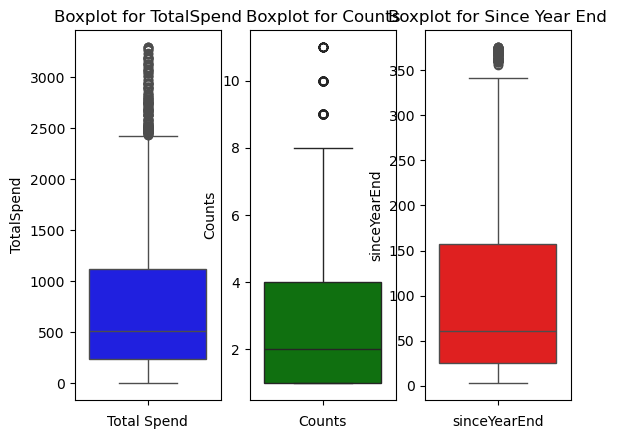

In [40]:
plt.subplot(1,3,1)
sns.boxplot(data=byCustomer_no_outlier['TotalSpend'], color='blue')
plt.title("Boxplot for TotalSpend")
plt.xlabel("Total Spend")

plt.subplot(1,3,2)
sns.boxplot(data=byCustomer_no_outlier['Counts'], color='green')
plt.title("Boxplot for Counts")
plt.xlabel("Counts")

plt.subplot(1,3,3)
sns.boxplot(data=byCustomer_no_outlier['sinceYearEnd'], color='red')
plt.title("Boxplot for Since Year End")
plt.xlabel("sinceYearEnd")

plt.show()

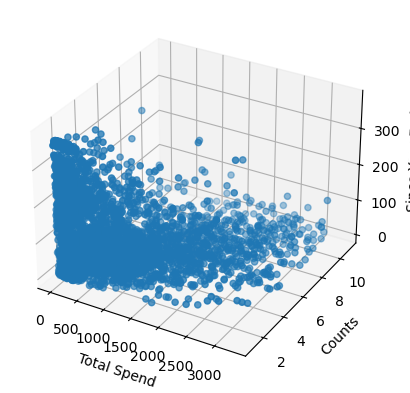

In [41]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter3D = ax.scatter3D(byCustomer_no_outlier['TotalSpend'],byCustomer_no_outlier['Counts'],byCustomer_no_outlier['sinceYearEnd'])

ax.set_xlabel("Total Spend")
ax.set_ylabel("Counts")
ax.set_zlabel("Since Year End")

plt.show()


In [42]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(byCustomer_no_outlier[['TotalSpend','Counts','sinceYearEnd']])
scale_data

array([[-0.88083728, -0.3837042 ,  0.68340244],
       [ 0.27122348, -0.3837042 , -0.96777937],
       [-0.77283465, -0.83167471, -0.24411327],
       ...,
       [-0.57690661, -0.83167471,  2.01861736],
       [ 0.24522389, -0.3837042 ,  0.14320098],
       [ 1.0789611 ,  0.51223682, -0.81489217]])

In [43]:
scale_data_df = pd.DataFrame(scale_data,index=byCustomer_no_outlier.index,columns=('TotalSpend','Counts','sinceYearEnd'))
scale_data_df

,TotalSpend,Counts,sinceYearEnd
0,-0.880837,-0.383704,0.683402
1,0.271223,-0.383704,-0.967779
2,-0.772835,-0.831675,-0.244113
3,1.642986,-0.383704,-0.560080
4,-0.661150,-0.831675,-0.886240
...,...,...,...
4243,-0.293963,1.408178,-0.814892
4244,-0.534652,-0.831675,-0.315461
4245,-0.576907,-0.831675,2.018617
4246,0.245224,-0.383704,0.143201


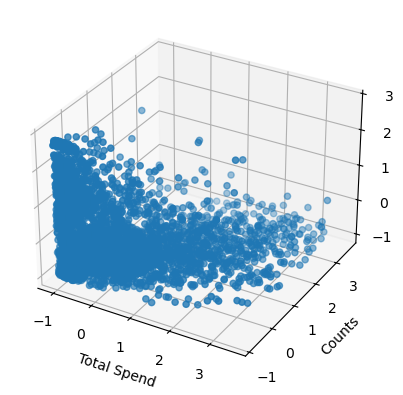

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

scatter3D = ax.scatter3D(scale_data_df['TotalSpend'],scale_data_df['Counts'],scale_data_df['sinceYearEnd'])

ax.set_xlabel("Total Spend")
ax.set_ylabel("Counts")
ax.set_zlabel("Since Year End")

plt.show()


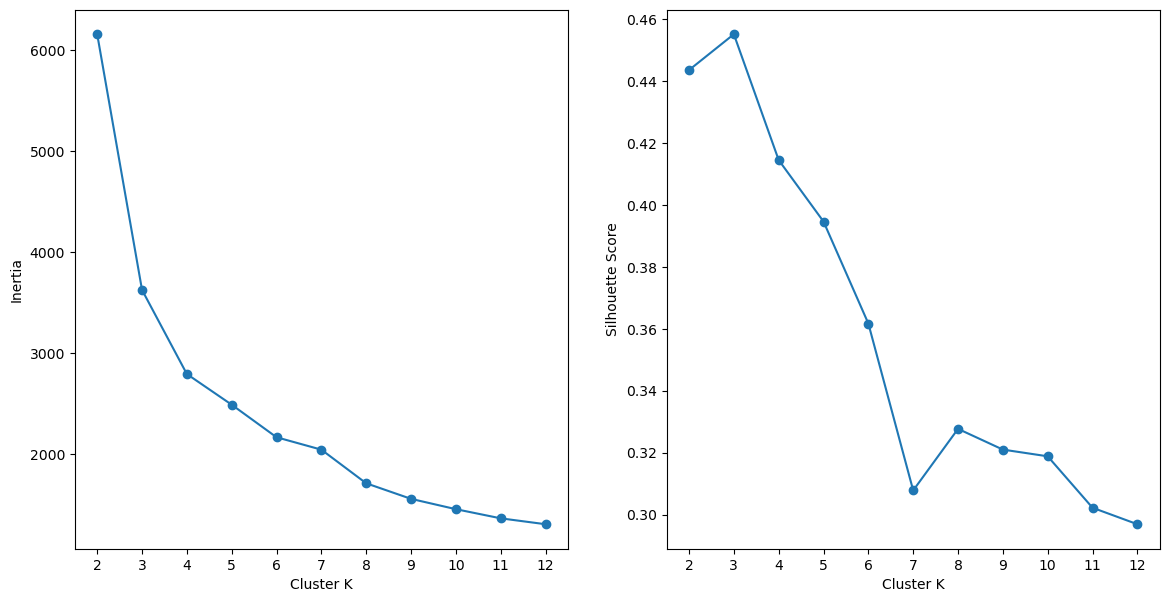

In [45]:
k_max = 12
inertia = []
sil_scores = []  

k = range(2, k_max + 1)

for k_value in k:
    kmeans = KMeans(n_clusters=k_value, random_state=42, max_iter=1000)

    cluster = kmeans.fit_predict(scale_data_df)

    
    sil_score = silhouette_score(scale_data_df, cluster)

    sil_scores.append(sil_score)  
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(k, inertia, marker='o')
plt.xlabel("Cluster K")
plt.ylabel("Inertia")
plt.xticks(k)

plt.subplot(1, 2, 2)
plt.plot(k, sil_scores, marker='o')
plt.xlabel("Cluster K")
plt.ylabel("Silhouette Score")
plt.xticks(k)

plt.show()

In [46]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=1000)

clusters = kmeans.fit_predict(scale_data_df)

clusters

array([0, 2, 2, ..., 0, 2, 3])

In [47]:
byCustomer_no_outlier.loc[:, 'Clusters'] = clusters
byCustomer_no_outlier

C:\Users\User\AppData\Local\Temp\ipykernel_13640\2317960408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  byCustomer_no_outlier.loc[:, 'Clusters'] = clusters


,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd,Clusters
0,12346,144.02,2,2010-06-28 13:53:00,167,0
1,12347,966.87,2,2010-12-07 14:57:00,5,2
2,12348,221.16,1,2010-09-27 14:59:00,76,2
3,12349,1946.64,2,2010-10-28 08:23:00,45,3
4,12351,300.93,1,2010-11-29 15:23:00,13,2
...,...,...,...,...,...,...
4243,18283,563.19,6,2010-11-22 15:30:00,20,3
4244,18284,391.28,1,2010-10-04 11:33:00,69,2
4245,18285,361.10,1,2010-02-17 10:24:00,298,0
4246,18286,948.30,2,2010-08-20 11:57:00,114,2


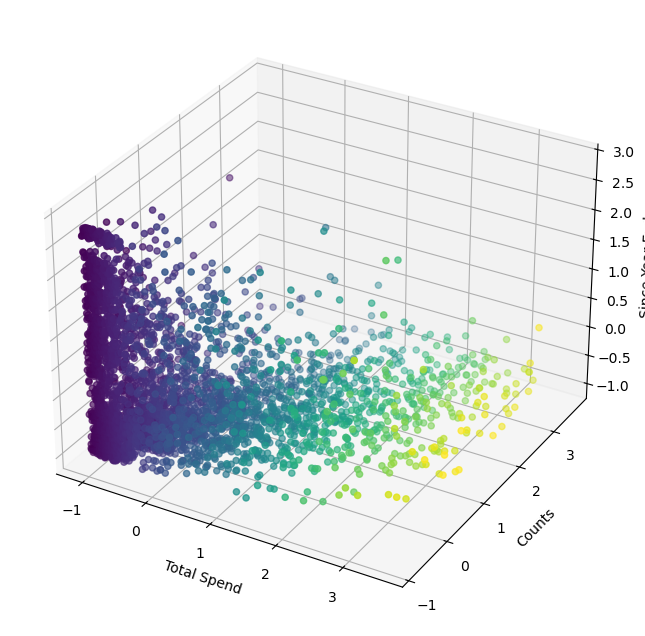

In [48]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

c = {0:''}

scatter3D = ax.scatter3D(scale_data_df['TotalSpend'],scale_data_df['Counts'],scale_data_df['sinceYearEnd'],c=scale_data_df['TotalSpend'], cmap='viridis')

ax.set_xlabel("Total Spend")
ax.set_ylabel("Counts")
ax.set_zlabel("Since Year End")

plt.show()

Text(0.5, 1.0, 'Histogram of Total Spend')

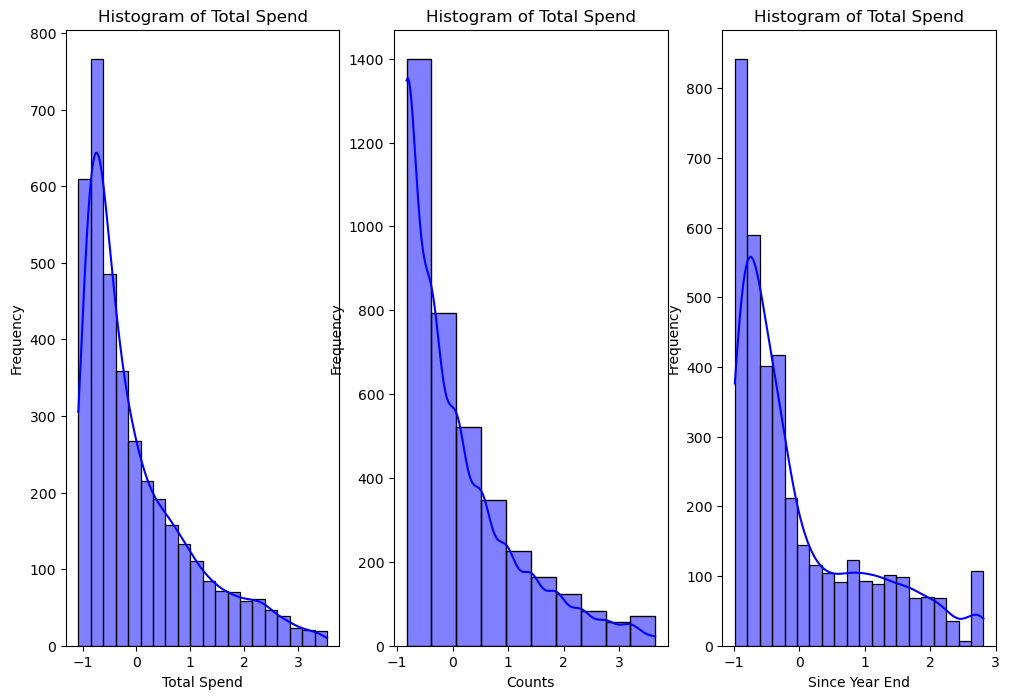

In [49]:
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
sns.histplot(scale_data_df['TotalSpend'], kde=True, color='blue', bins=20)
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Histogram of Total Spend')

plt.subplot(1,3,2)
sns.histplot(scale_data_df['Counts'], kde=True, color='blue', bins=10)
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Total Spend')

plt.subplot(1,3,3)
sns.histplot(scale_data_df['sinceYearEnd'], kde=True, color='blue', bins=20)
plt.xlabel('Since Year End')
plt.ylabel('Frequency')
plt.title('Histogram of Total Spend')

In [50]:
cluster_array = byCustomer_no_outlier['Clusters'].to_numpy()
cluster_array

array([0, 2, 2, ..., 0, 2, 3])

In [51]:
np.unique(cluster_array)

array([0, 1, 2, 3])

In [52]:
byCustomer_no_outlier

,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd,Clusters
0,12346,144.02,2,2010-06-28 13:53:00,167,0
1,12347,966.87,2,2010-12-07 14:57:00,5,2
2,12348,221.16,1,2010-09-27 14:59:00,76,2
3,12349,1946.64,2,2010-10-28 08:23:00,45,3
4,12351,300.93,1,2010-11-29 15:23:00,13,2
...,...,...,...,...,...,...
4243,18283,563.19,6,2010-11-22 15:30:00,20,3
4244,18284,391.28,1,2010-10-04 11:33:00,69,2
4245,18285,361.10,1,2010-02-17 10:24:00,298,0
4246,18286,948.30,2,2010-08-20 11:57:00,114,2


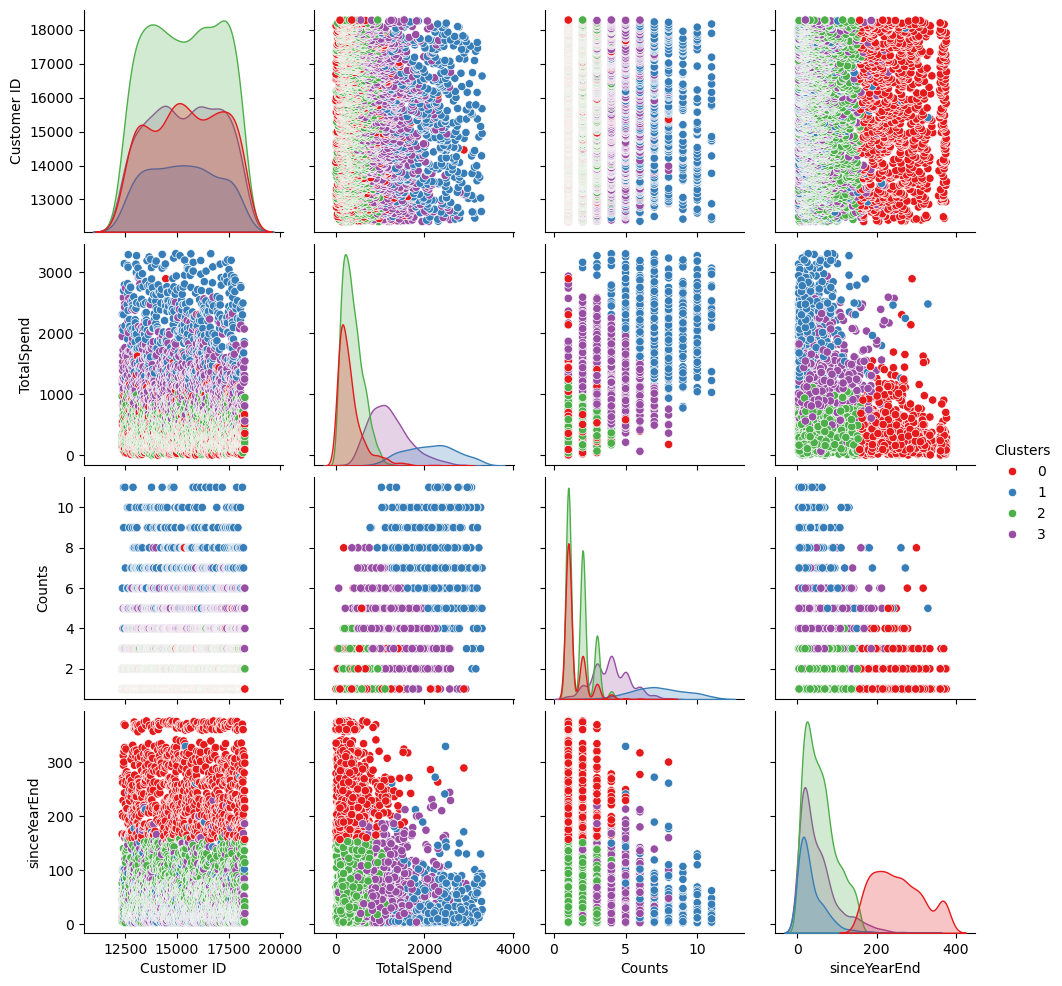

In [53]:
sns.pairplot(byCustomer_no_outlier, hue='Clusters', palette='Set1')

plt.show()

In [54]:
cluster_means = byCustomer_no_outlier.groupby('Clusters').mean()
cluster_means

,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd
Clusters,,,,,
0,15448.756726,328.495561,1.431614,2010-04-02 04:55:26.569506816,254.343049
1,15274.488017,2136.060283,7.337691,2010-11-05 18:53:21.045751808,36.771242
2,15361.315721,375.559504,1.694064,2010-10-15 23:59:48.571428608,57.553816
3,15364.609323,1195.531077,3.962264,2010-10-22 03:12:46.348501760,51.420644


In [65]:
byCustomer_no_outlier[byCustomer_no_outlier['Clusters']==3]

,Customer ID,TotalSpend,Counts,LatestDate,sinceYearEnd,Clusters
3,12349,1946.64,2,2010-10-28 08:23:00,45,3
8,12356,2092.58,3,2010-11-24 12:24:00,18,3
10,12358,1181.61,3,2010-11-29 10:56:00,13,3
12,12360,1235.05,3,2010-11-12 11:31:00,30,3
16,12369,1458.05,3,2010-10-22 13:13:00,51,3
...,...,...,...,...,...,...
4235,18272,1307.40,3,2010-06-09 14:37:00,186,3
4237,18276,1249.26,5,2010-11-12 10:11:00,30,3
4238,18277,809.64,4,2010-11-07 15:52:00,35,3
4243,18283,563.19,6,2010-11-22 15:30:00,20,3


- cluster 0 = low spending, higher date since last purchase, low counts customers
- cluster 1 = high spending ,recently , hihg count
- cluster 2 = higher than clsuter 0 in every aspect  but recency is higher
- cluster 3 = high spend, moderate count, recenttly purchase  